# Подключение библиотек и выбор папки

In [1]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

import seaborn as sns
import os
import time
import gc

from time import time

# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims
import trackpy as tp

from ipywidgets import IntProgress
from IPython.display import display

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 5))
mpl.rc('image', cmap='gray')

k_to_µm = 0.16 #надо посчитать количество микрон (в ширину) на всей картинке,
               #а потом разделить на количество пикселей в ширину. Потом просто умножать скорости на это.
k_to_sec = 25 # тоже надо умножать скорости на это для перевода из мкм/кадр в мкм/сек. Это просто сколько кадров в секунду

@pims.pipeline
def gray(image):
    return image[:, :, 1]  # Take just the green channel

In [2]:
# Указываем путь к директории
#directory = "C:\Synology\Alex\dev\\trackCalc\\antibiotic"
#directory = "C:\Synology\Alex\dev\\trackCalc\\test\\file_test"
directory = "D:\\МАРЬЯМ 13.03.2025\\2 часа"
directory = "D:\\POBEDA\\Для Алексея 10.04.25"
directory = "C:\\Users\\slono\\Desktop\\FT"

filt_len = 2 #длина траекторий для фильтрации, 50 - это 4 секунды хотя бы
base_n = 50 #база для усрднения фона
threshold_bc = 2 #уровень шума для вычитания фона

k_to_µm = 0.16

#_______________________________

files = []
trj_list = []
hist_list = []
title_list = []
label_list = []
 
# Выводим список файлов
files += os.listdir(directory)
i = 0
for name in files:
    if name.split('.')[-1] == 'csv':
        title_list.append(name)
        print(i, name)
        i+=1
label_list = title_list

#выбираем файл и загружаем его
print('первый файл в папке')
file_name = title_list[0]
f = pd.read_csv(directory + '\\' + file_name)

f

0 К-1840 -3,5ч - 2ЭКЗ.csv
1 К-1840 -3,5ч.csv
2 К-1840-1час.csv
3 К-1840-2 часа.csv
4 ФТ-1840-1 час.csv
5 ФТ-1840-2часа.csv
6 ФТ-1840-3,5ч.csv
первый файл в папке


,Unnamed: 0,y,x,mass,size,ecc,signal,raw_mass,ep,frame
0,0,6.114504,373.015267,11.452709,2.113208,0.063801,1.311379,25.02,0.084573,0
1,1,7.812245,527.097959,21.419188,3.054605,0.473568,1.223954,40.38,0.052248,0
2,2,5.790625,567.787500,27.976083,2.679202,0.175770,2.447907,67.20,0.031336,0
3,3,7.014925,1232.594030,29.287462,2.474346,0.047767,2.185631,67.00,0.031429,0
4,4,7.446309,357.939597,26.052727,2.973597,0.232272,1.573655,62.38,0.033764,0
...,...,...,...,...,...,...,...,...,...,...
1734415,1734415,949.764273,1168.149171,53.225839,2.974725,0.529306,2.156480,128.08,0.024778,879
1734416,1734416,951.657244,148.819788,27.740170,2.523389,0.354013,1.764392,59.46,0.053579,879
1734417,1734417,952.438095,398.164286,41.169158,2.961258,0.343379,3.234720,154.62,0.020513,879
1734418,1734418,952.958602,533.061828,182.320555,2.891776,0.114473,5.979330,436.00,0.007262,879


# Построение одной гистограммы скоростей

TODO

Сделать разные сравнение пар видео. распределение длительностей, скоростей и тд.

Вообще подумать как пределать этот раздел

In [68]:
hist_list = []
label_list = []
part_n_list = []
frames_list = []

In [73]:
for i in range(len(title_list)):
    print(i, title_list[i])
file_name = title_list[int(input())]
f = pd.read_csv(directory + '\\' + file_name)

0 К-1840 -3,5ч - 2ЭКЗ.csv
1 К-1840 -3,5ч.csv
2 К-1840-1час.csv
3 К-1840-2 часа.csv
4 ФТ-1840-1 час.csv
5 ФТ-1840-2часа.csv
6 ФТ-1840-3,5ч.csv


 6


In [71]:
mem = 0

mass_level = 200
max_dist = 20
diam = 21



Frame 877: 63 trajectories present.
len more then  15  =  403 max_dist = 20


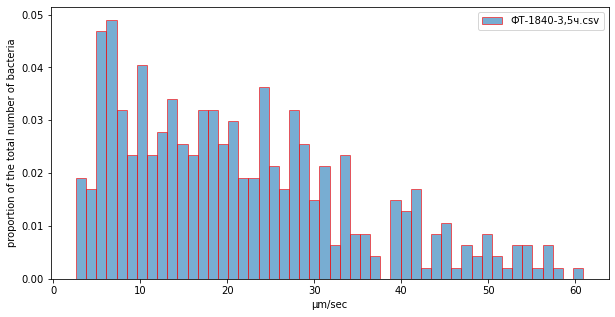

In [74]:
#вычисляем данные для гистограммы
new_f = f[f['mass'] > mass_level]
t = tp.link(new_f, max_dist, memory=mem)
filt_len = 15


speeds = []
#d = tp.compute_drift(t)
#t = tp.subtract_drift(t.copy(), d)

#рассчет средней скорости у частиц

t1 = tp.filter_stubs(t, filt_len)
print('len more then ', filt_len, ' = ', t1['particle'].nunique(),"max_dist =", max_dist)
for i in t1['particle'].unique():
    speed = t1[t1['particle'] == i]
    speed = speed.diff()
    speed['v'] = ((speed['x']*speed['x'] + speed['y']*speed['y'])**(0.5)/speed['frame'])*k_to_µm*k_to_sec
    v = speed['v'].mean()
    speeds.append(v)

stat = pd.DataFrame({'number': t1['particle'].unique(), 'mean_V': speeds})
hist_list.append(stat)
label_list.append(file_name)

#рассчет количества подвижных частиц для каждого кадра
frames = t1.frame.unique()
part_n = []
for frame in frames:
    if frame not in t1['frame']:
        frames.remove(frame)
    else:
        part_n.append(len(t1[t1['frame'] == frame]['particle'].unique()))
part_n_list.append(part_n)
frames_list.append(frames)

# рисуем гистограмму
plt.hist(stat['mean_V'], bins=50, label=file_name, alpha=0.6, edgecolor='red', density = True)
plt.legend()
plt.ylabel('proportion of the total number of bacteria')
plt.xlabel('µm/sec')
plt.show()

# Описанный прямоугольник (пок ане работает)

In [ ]:
#Исследуем траектории при помощи описанного прямоугольника

#Нормировка н аколичество кадров!
def get_l(t2):
    x = min(t2['x'])
    y = min(t2['y'])
    dx = max(t2['x']) - min(t2['x'])
    dy = max(t2['y']) - min(t2['y'])
    return (dx*dx + dy*dy)**0.5

filt_len = 50
t1 = tp.filter_stubs(t, filt_len)

print("trj longer then "+str(filt_len))
print(t1['particle'].nunique())

stat = []
N = len(t1['frame'].unique())
for i in t1['particle'].unique():
    stat.append(get_l(t1[t1['particle'] == i]) / N)


# рисуем гистограмму
hist_data = plt.hist(stat, bins=50, label=file_name, alpha=0.6, edgecolor='red', density = True)
plt.legend()
plt.xlabel('пробег за кадр (пкс)')
plt.ylabel('доля таких частиц')
plt.show()

# данные из гистограммы https://ru.stackoverflow.com/questions/1348754/%D0%9A%D0%B0%D0%BA-%D0%BF%D0%BE%D0%BB%D1%83%D1%87%D0%B8%D1%82%D1%8C-%D0%BF%D1%80%D0%BE%D0%BC%D0%B5%D0%B6%D1%83%D1%82%D0%BA%D0%B8-plt-hist

In [ ]:
print(file_name, mass_level, max_dist, filt_len)
print("вероятности второй половины распределения",np.sum(hist_data[0][25:] *np.diff(hist_data[1][25:])) )

critical_l = 0.25
for i in range(len(hist_data[1])):
    if hist_data[1][i] > critical_l:
        break

print("вероятность убегания более чем на",critical_l, "равна", np.sum(hist_data[0][i:] *np.diff(hist_data[1][i:])) )

print("Общая вероятность", np.sum(hist_data[0] *np.diff(hist_data[1])) )

# Обработка всех траекторий

Change К-1840 -3,5ч.csv P.a. control (3h)
Change ФТ-1840-3,5ч.csv P.a. FT (3h)


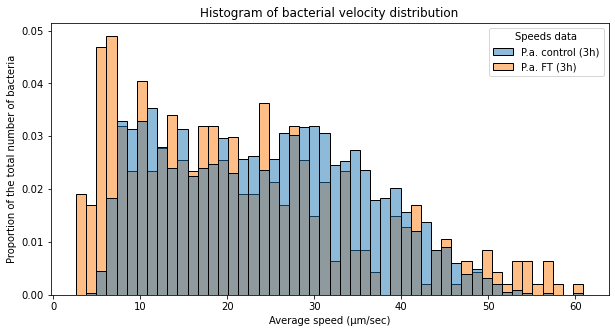

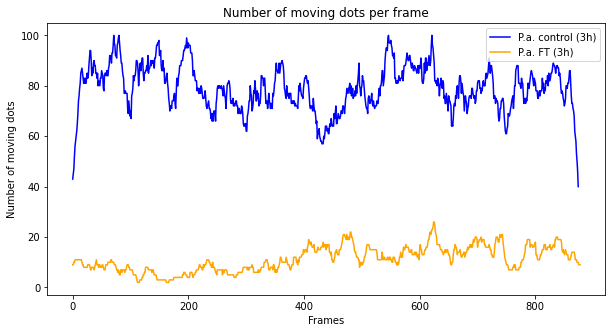

Set                            |    Mean    |      Std (σ)      
----------------------------------------
P.a. control (3h)             |   79.07    |        9.04       
P.a. FT (3h)                  |   11.25    |        4.86       


In [89]:
res = []
new_label = []
for name in label_list:
    new_label.append(input('Change '+ name))
    #new_label.append(name)
    

for i in range(len(hist_list)):
    temp = hist_list[i]
    temp['Speeds data'] = new_label[i]
    res.append(temp)
df_comp = pd.concat(res)
df_comp.reset_index(inplace=True)

#нормированная гистограмма
sns.histplot(data=df_comp, x='mean_V', hue='Speeds data', bins=50, stat='density', common_norm=False);
plt.title("Histogram of bacterial velocity distribution");
plt.ylabel('Proportion of the total number of bacteria')
plt.xlabel('Average speed (µm/sec)')
plt.show()

colors = ['blue','orange','green' , 'red', 'yellow','gray']
for i in range(len(part_n_list)):
    plt.plot(frames_list[i], part_n_list[i], colors[i], label = new_label[i])


#нормированная гистограмма
plt.title("Number of moving dots per frame");
plt.ylabel('Number of moving dots')
plt.xlabel('Frames')
plt.legend()
plt.show()


# Обработка и вывод
print(f"{'Set':<30} | {'Mean':^10} | {'Std (σ)':^18}")
print("-" * 40)
for i in range(len(part_n_list)):
    arr = np.array(part_n_list[i])
    mean = arr.mean()
    std = arr.std(ddof=1)  # ddof=1 — для выборочного стандартного отклонения
    print(f"{new_label[i]:<30}| {mean:^10.2f} | {std:^18.2f}")

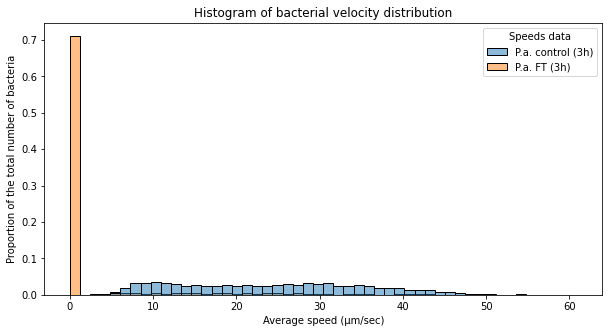

In [90]:
N1 = len(df_comp[df_comp['Speeds data'] == 'P.a. control (3h)'].number.unique())
N2 = len(df_comp[df_comp['Speeds data'] == 'P.a. FT (3h)'].number.unique())
for i in range(N2, N1):
    
    new_row = {'index': 403, 'number': 100000+i, 'mean_V': 0, 'Speeds data': 'P.a. FT (3h)'}
    df_comp = df_comp.append(new_row, ignore_index=True)
#нормированная гистограмма
sns.histplot(data=df_comp, x='mean_V', hue='Speeds data', bins=50, stat='density', common_norm=False);
plt.title("Histogram of bacterial velocity distribution");
plt.ylabel('Proportion of the total number of bacteria')
plt.xlabel('Average speed (µm/sec)')
plt.show()

In [93]:
df_comp

,index,number,mean_V,Speeds data
0,0,1,16.901491,P.a. control (3h)
1,1,11,46.800566,P.a. control (3h)
2,2,13,12.796736,P.a. control (3h)
3,3,16,20.153102,P.a. control (3h)
4,4,31,7.486531,P.a. control (3h)
...,...,...,...,...
6009,403,103002,0.000000,P.a. FT (3h)
6010,403,103003,0.000000,P.a. FT (3h)
6011,403,103004,0.000000,P.a. FT (3h)
6012,403,103005,0.000000,P.a. FT (3h)


In [49]:
output = ""
for mass_level in range(40, 70, 20):

    output += "mass = " + str(mass_level)+'\n'

    for i in range(len(title_list)):
        print(title_list[i])
        file_name = title_list[i]
        f = pd.read_csv(directory + '\\' + file_name)

        new_f = f[f['mass'] > mass_level]
        t = tp.link(new_f, max_dist, memory=mem)
        filt_len = 15
        t1 = tp.filter_stubs(t, filt_len)

        frames = t1.frame.unique()
        part_n = []
        for frame in frames:
            if frame not in t1['frame']:
                frames.remove(frame)
            else:
                part_n.append(len(t1[t1['frame'] == frame]['particle'].unique()))
        arr = np.array(part_n)
        mean = arr.mean()
        std = arr.std(ddof=1)  # ddof=1 — для выборочного стандартного отклонения
        output +=f"{file_name:<30}| {mean:^10.2f} | {std:^18.2f}" +'\n'
print(output)

Frame 877: 343 trajectories present.
mass = 40
К-1840 -3,5ч - 2ЭКЗ.csv       |   370.35   |       24.63       
К-1840 -3,5ч.csv              |   387.39   |       24.29       
К-1840-1час.csv               |   144.50   |        8.98       
К-1840-2 часа.csv             |   74.14    |        7.16       
ФТ-1840-1 час.csv             |   68.33    |        6.06       
ФТ-1840-2часа.csv             |   58.77    |        6.85       
ФТ-1840-3,5ч.csv              |   58.55    |       10.45       
mass = 60
К-1840 -3,5ч - 2ЭКЗ.csv       |   343.06   |       22.40       
К-1840 -3,5ч.csv              |   361.10   |       23.16       
К-1840-1час.csv               |   132.44   |        8.09       
К-1840-2 часа.csv             |   57.84    |        6.35       
ФТ-1840-1 час.csv             |   52.99    |        5.32       
ФТ-1840-2часа.csv             |   44.46    |        5.18       
ФТ-1840-3,5ч.csv              |   46.24    |       10.36       

